# AM 216 Homework 2 Problem 2
Adriana Trejo-Sheu
collaborators: 

### Import Functions

In [6]:
from __future__ import division
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow as tf

import time
import datetime

# from google.colab import drive
# drive.mount('/content/drive')

# import os
# path = "/content/drive/MyDrive/semester 2/AM216/HW2" # Your path here
# os.chdir(path)

filename_low_64 = "PS2-a-lowT"
filename_high_64 = "PS2-a-highT"

filename_low_32 = "PS2-b-lowT"
filename_high_32 = "PS2-b-highT"



### Import  64x64 Data

In [7]:
#Import the relevent images into python
high_t_64 = []
for i in range(500):
    high_t_64.append(np.loadtxt((filename_high_64+'/')+str(i).zfill(3), delimiter=','))

In [8]:
#Import the relevent images into python
low_t_64 = []
for i in range(500):
    low_t_64.append(np.loadtxt((filename_low_64+'/')+str(i).zfill(3), delimiter=','))

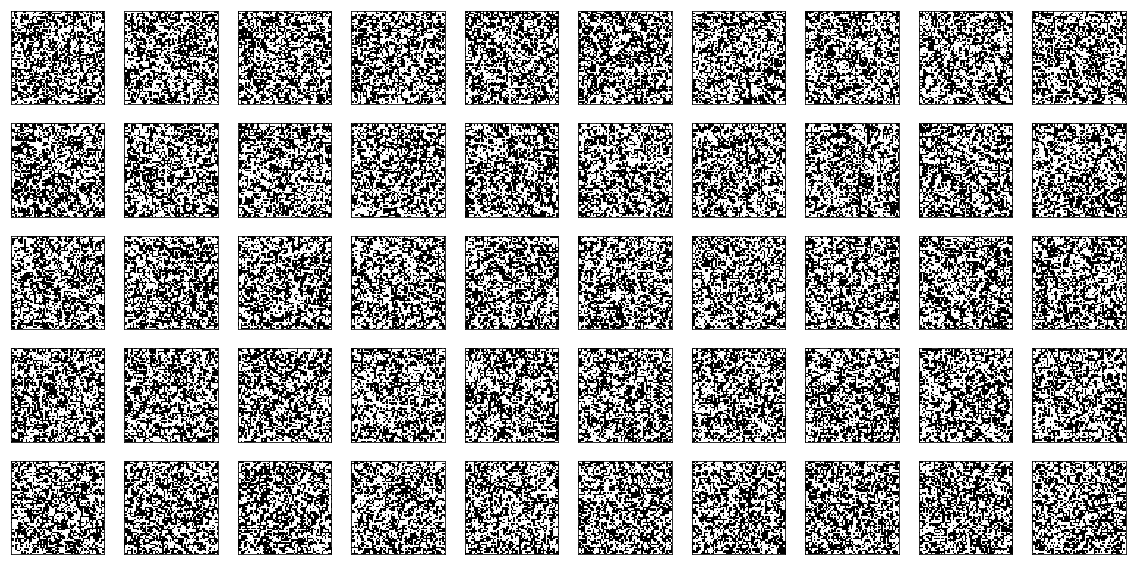

In [9]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(high_t_64[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

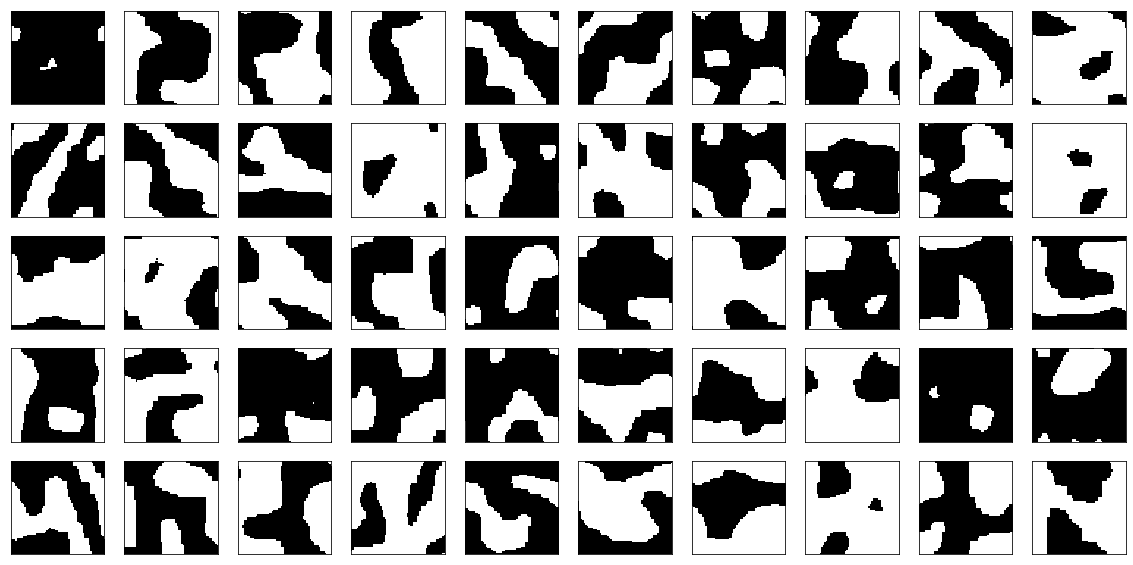

In [10]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(low_t_64[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

In [11]:
#Combine the two data-sets into a single array
data_img_64 = np.concatenate((high_t_64,low_t_64))

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data_img_64 = data_img_64.reshape((-1, 64*64))

#Provide a set of labels which match the images (1 for high, and 0 for low)
data_label_64 = np.concatenate((np.ones(len(high_t_64)), np.zeros(len(low_t_64))))

#Randomize the data and labels in the same manner, so that I can easily create train and test sets
data_img_64, data_label_64 = shuffle(data_img_64, data_label_64, random_state = 0)

### Import 32x32 Data

In [12]:
#Import the relevent images into python
high_t_32 = []
for i in range(500):
    high_t_32.append(np.loadtxt((filename_high_32+'/')+str(i).zfill(3), delimiter=','))


In [13]:
#Import the relevent images into python
low_t_32 = []
for i in range(500):
    low_t_32.append(np.loadtxt((filename_low_32+'/')+str(i).zfill(3), delimiter=','))

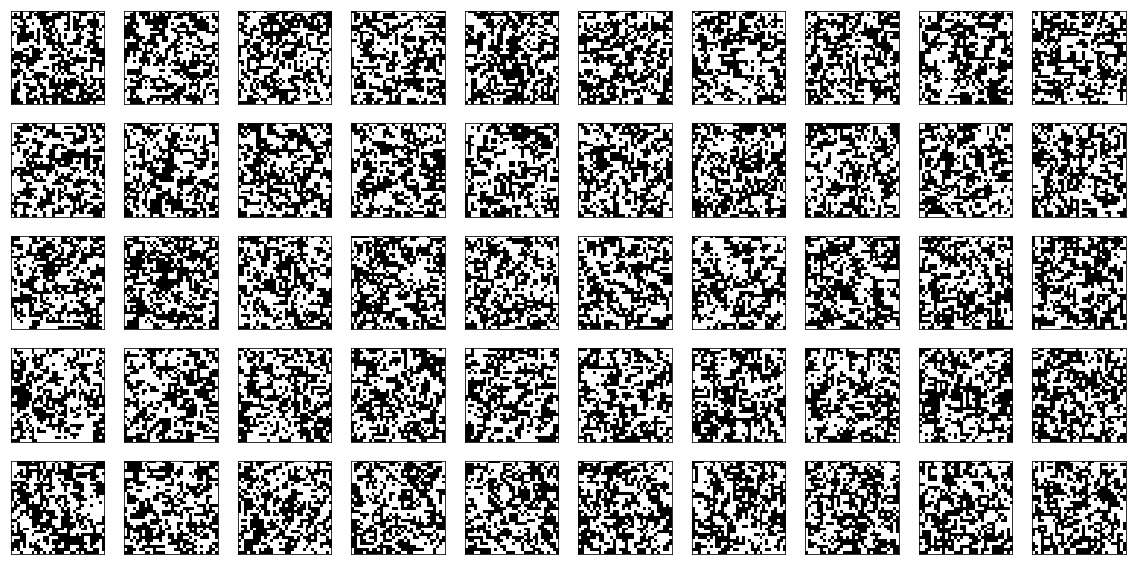

In [14]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(high_t_32[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

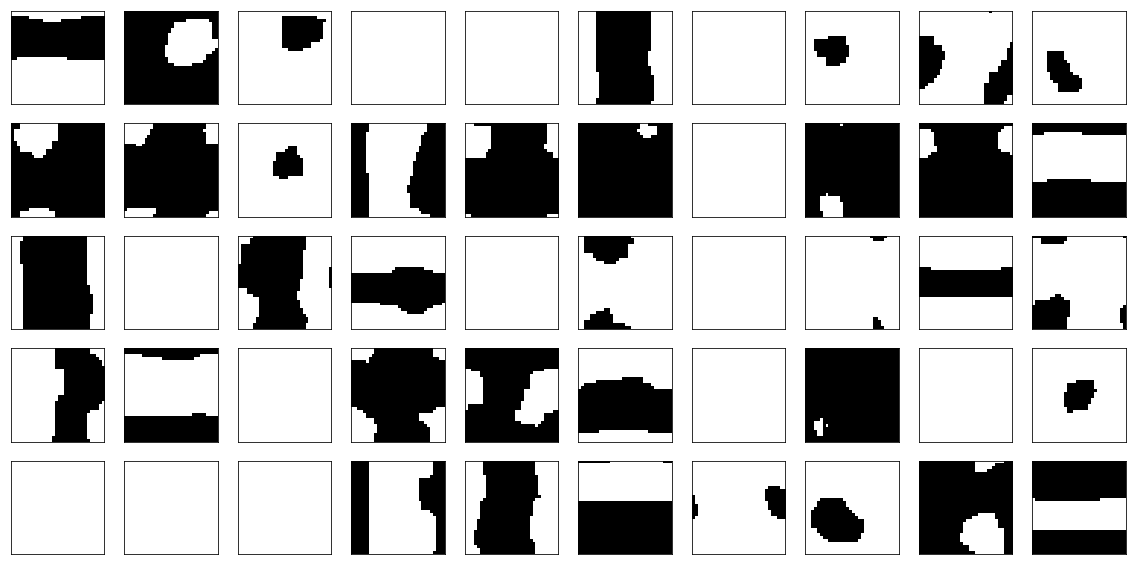

In [15]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(low_t_32[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

In [16]:
#Combine the two data-sets into a single array
data_img_32 = np.concatenate((high_t_32,low_t_32))

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data_img_32 = data_img_32.reshape((-1, 32*32))

#Provide a set of labels which match the images (1 for high, and 0 for low)
data_label_32 = np.concatenate((np.ones(len(high_t_32)), np.zeros(len(low_t_32))))

#Randomize the data and labels in the same manner, so that we can easily create train and test sets
data_img_32, data_label_32 = shuffle(data_img_32, data_label_32, random_state = 0)

## Part a: Train a SVM (64x64)

### Determine Best Fitting Parameters

**[Introduction](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction)**

In the case of the Ising dataset, the task is to predict, given an image, which phase it is in. We are given samples of the two phases on which we fit an estimator to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods `fit(X, y)` and `predict(T)`.

An example of an estimator is the class `sklearn.svm.SVC`, which implements support vector classification. The estimator’s constructor takes as arguments the model’s parameters.

For example : `classifier = svm.SVC(C=1e1,kernel='rbf',gamma=0.003,cache_size=8000,probability=False)` has three important pieces of information: the values for *C*, the *kernel*, and *gamma*.

---



**[Choosing the parameters of the model](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)**

To find good values for these parameters, we can use tools such as grid search and cross validation.

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include `C`, `kernel` and `gamma` for Support Vector Classifier, `alpha` for Lasso, etc.

A search consists of:

* an estimator (regressor or classifier such as sklearn.svm.SVC());
* a parameter space;
* a method for searching or sampling candidates;
* a cross-validation scheme; and
* a score function.

Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, `GridSearchCV` exhaustively considers all parameter combinations, while `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution.

For the purpose of this code, we encourage you to use the `GridSearchCV` functions.  You should run the training using a combination of given parameters, and then take the best combination.

In [17]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
#PERFORM A GRID SEARCH HERE
estimator = SVC()
param_grid = [
  {'C': [1, 10, 100, 1000], 'gamma': ['auto', 'scale'],'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': ['auto', 'scale'],'kernel': ['rbf']},
 {'C': [1, 10, 100, 1000], 'gamma': ['auto', 'scale'],'kernel': ['sigmoid']},
 ]

clf = GridSearchCV(estimator,param_grid, n_jobs = -1, cv = 10)

clf.fit(data_img_32, data_label_32)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results ### VALIDATION SCORES
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r " % (mean, std * 2, params))


Best parameters found:
 {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.639 (+/-0.076) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'} 
0.639 (+/-0.076) for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'} 
0.639 (+/-0.076) for {'C': 10, 'gamma': 'auto', 'kernel': 'linear'} 
0.639 (+/-0.076) for {'C': 10, 'gamma': 'scale', 'kernel': 'linear'} 
0.639 (+/-0.076) for {'C': 100, 'gamma': 'auto', 'kernel': 'linear'} 
0.639 (+/-0.076) for {'C': 100, 'gamma': 'scale', 'kernel': 'linear'} 
0.639 (+/-0.076) for {'C': 1000, 'gamma': 'auto', 'kernel': 'linear'} 
0.639 (+/-0.076) for {'C': 1000, 'gamma': 'scale', 'kernel': 'linear'} 
0.995 (+/-0.010) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'} 
0.995 (+/-0.010) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'} 
0.995 (+/-0.010) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'} 
0.995 (+/-0.010) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} 
0.995 (+/-0.010) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'} 
0.995 (+/-0.010) for {'C': 100, 'gamma': '

### Train and Test Model

In [18]:
#TRAIN YOUR FINAL MODEL USING PARAMETERS FROM GRID SEARCH HERE
#data_img_32, data_label_32
svc = SVC(C = 1 , kernel = 'rbf')

xtrain = data_img_32[:800]
ytrain = data_label_32[:800]

xtest= data_img_32[800:]
ytest = data_label_32[800:]

#train
svc.fit(xtrain, ytrain)

#evaluate
print("Data Image 32")
acc_train = svc.score(xtrain, ytrain)
acc_test = svc.score(xtest, ytest)
print(f"Mean Accuracy Train: {acc_train}\nMean Accuracy Test: {acc_test}")

Data Image 32
Mean Accuracy Train: 1.0
Mean Accuracy Test: 0.99


In [19]:
#data_img_32, data_label_32
svc = SVC(C = 1 , kernel = 'rbf')

xtrain = data_img_64[:800]
ytrain = data_label_64[:800]

xtest= data_img_64[800:]
ytest = data_label_64[800:]

#train
svc.fit(xtrain, ytrain)

#evaluate
print("Data Image 64")
acc_train = svc.score(xtrain, ytrain)
acc_test = svc.score(xtest, ytest)
print(f"Mean Accuracy Train: {acc_train}\nMean Accuracy Test: {acc_test}")

Data Image 64
Mean Accuracy Train: 1.0
Mean Accuracy Test: 1.0


In [20]:
xtrain.shape

(800, 4096)

## Part a: Train a NN (64x64)

**[Introduction](https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a)**

Neural networks work far better than other existing methods for classification.  However, determining the right pair of hyperparameters for a neural network can be incredibly difficult.  For the purposes of this homework, try playing around with the following hyperparameters:

* the activation functions used in your hidden layers
* the dropout rate used in your hidden layers
* the number of nodes in your hidden layers

In [21]:
# Prepare our data to be inputted into a network
n_train = 750
batch_size = 64 #try 32, 64,128, 256
num_classes = 2
epochs = 3

def make_data(x_train, x_test, y_train, y_test, img_rows, img_cols, num_classes):


    t = time.time()

    # Keras requires inputted data to be in a specific shape.
    # This if-statement puts it in the correct format for us.
    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    #Because our data is already between 0 and 1, we have no need to rescale it
    #(As we would for a color or greyscale image)

    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train_binary = tf.keras.utils.to_categorical(y_train, num_classes)
    y_test_binary = tf.keras.utils.to_categorical(y_test, num_classes)
    return x_train, x_test, y_train_binary, y_test_binary

In [22]:
img_rows, img_cols = 64, 64
n_train = 750
batch_size = 64 #try 32, 64,128, 256
num_classes = 2
epochs = 3

y_train = data_label_64[:n_train]
y_test = data_label_64[n_train:]

x_train, x_test, y_train_binary, y_test_binary = make_data(data_img_64[:n_train], \
        data_img_64[n_train:], data_label_64[:n_train], data_label_64[n_train:], img_rows, img_cols, num_classes)

x_train shape: (750, 64, 64, 1)
750 train samples
250 test samples


In [23]:
y_train[1:10]

array([0., 1., 0., 0., 0., 1., 1., 1., 0.])

In [24]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(64, 64,1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(2)
])

In [25]:
model.compile(
    optimizer=tf.keras.optimizers.Adagrad(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [26]:
model.fit(x_train, y_train, epochs = 6)

Epoch 1/6
24/24 [==============================] - 1s 3ms/step - loss: 0.7643 - sparse_categorical_accuracy: 0.6000
Epoch 2/6
24/24 [==============================] - 0s 4ms/step - loss: 0.3972 - sparse_categorical_accuracy: 0.8240
Epoch 3/6
24/24 [==============================] - 0s 5ms/step - loss: 0.2512 - sparse_categorical_accuracy: 0.9307
Epoch 4/6
24/24 [==============================] - 0s 5ms/step - loss: 0.1781 - sparse_categorical_accuracy: 0.9827
Epoch 5/6
24/24 [==============================] - 0s 4ms/step - loss: 0.1356 - sparse_categorical_accuracy: 0.9933
Epoch 6/6
24/24 [==============================] - 0s 11ms/step - loss: 0.1087 - sparse_categorical_accuracy: 0.9947


In [27]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.3295 - sparse_categorical_accuracy: 0.8560


[0.32952719926834106, 0.8560000061988831]

## Part b: Find $T_c$

### Ising Functions

In [28]:
# Simulating the Ising model
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''  
    def __init__(self, size, temp):
        self.temp = temp
        self.N = int(size)
    ## monte carlo moves
    
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N) # select a row
                    b = np.random.randint(0, N) # select a column
                    s =  config[a, b] # current state at (a, b)
                    # periodic boundary condition imposed
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        config = 2*np.random.randint(2, size=(self.N,self.N))-1   
        times = 100
        for i in range(times):
            self.mcmove(config, self.N, 1.0/self.temp)
        return config

In [29]:
svc32 = SVC(C = 1 , kernel = 'rbf')


xtrain_32 = data_img_32[:800]
ytrain_32 = data_label_32[:800]

xtest_32= data_img_32[800:]
ytest_32 = data_label_32[800:]

xtrain_32.shape
ytrain.shape
svc32.fit(xtrain_32, ytrain_32)

SVC(C=1)

In [30]:
temp = 3
ising_simu = Ising(32, temp)
result = ising_simu.simulate()

temp_list = np.linspace(0.01,100,100)

results = np.zeros((len(temp_list), 1024))

for i in range(len(temp_list)):
    ising_simu = Ising(32, temp_list[i])
    result = ising_simu.simulate()
    results[i] = result.reshape(-1,32*32)

In [31]:
test_pred = svc32.predict(results)

#Finding when its consider a high temperature or prediction is 1 

i = 0
while test_pred[i] == 0:
    i += 1
critical = temp_list[i-1] # or is it 1
print("Critical Temperature is the last temperature that was labeled low")
print(f"Critical Temperature:", critical)

Critical Temperature is the last temperature that was labeled low
Critical Temperature: 2.03


## Part c: Find $T_1$ and $T_2$

resource: https://www.machinecurve.com/index.php/2020/02/21/how-to-predict-new-samples-with-your-keras-model/

In [91]:
data_ordered = np.concatenate((high_t_32,low_t_32))

In [92]:
low_temp = data_ordered[500:]
high_temp = data_ordered[:500]
#plt.imshow(low_temp[0])

high_avg = sum(high_temp)/500
print("high",high_avg)
print()

low_avg = sum(low_temp)/500
print("low",low_avg)

high [[ 0.016  0.028  0.008 ...  0.004 -0.024  0.068]
 [-0.008 -0.016 -0.02  ...  0.088  0.092  0.036]
 [ 0.072 -0.068  0.028 ... -0.02  -0.044  0.084]
 ...
 [-0.016 -0.044 -0.072 ... -0.036  0.036  0.056]
 [ 0.028  0.104  0.092 ...  0.    -0.056 -0.012]
 [ 0.06   0.088  0.056 ...  0.028 -0.02   0.056]]

low [[-0.036 -0.02  -0.02  ... -0.068 -0.048 -0.04 ]
 [-0.036 -0.032 -0.024 ... -0.072 -0.064 -0.048]
 [-0.032 -0.036 -0.04  ... -0.084 -0.064 -0.052]
 ...
 [-0.012 -0.02  -0.02  ... -0.028 -0.02  -0.02 ]
 [-0.032 -0.012 -0.024 ... -0.044 -0.024 -0.024]
 [-0.028 -0.016 -0.024 ... -0.072 -0.044 -0.028]]


In [93]:
# seperating low and high temperatures based on the critical point. 
# This should help reduce errors & allow for better predictions
temp_low = np.linspace(0.84,0.89,5)  # values chosen after previous runs
temp_high = np.linspace(8.2, 8.9,5)
print(temp_low)
print(temp_high)


[0.84   0.8525 0.865  0.8775 0.89  ]
[8.2   8.375 8.55  8.725 8.9  ]


In [94]:
''' Input: List of temperatues to test
    Output: matrix (len(temperature list)* 30, 32,32)
    This function works to create training set with 30 examples of each temperature value to train on'''
def get_data(temp):
    index = 0
    train_data = np.zeros((len(temp)*30, 32,32))
    for i in temp: 
        for j in range(30):
            ising_simu = Ising(32, i)
            result = ising_simu.simulate()
            train_data[index] = result
            index += 1
    return train_data

In [95]:
# avoid rerunning
train_low = get_data(temp_low)
train_high = get_data(temp_high)

In [96]:
train_low.shape

(150, 32, 32)

In [97]:
labels = np.zeros(30*5,)
beg, end = 0 , 30
for i in range(5):
    labels[beg:end] = i
    beg = end
    end = beg + 30

In [98]:
train_low_re = train_low.reshape((150, -1))
train_high_re = train_high.reshape((150,-1))
train_low_re.shape

(150, 1024)

In [99]:
train_low, low_labels = shuffle(train_low_re, labels, random_state = 0)
xtrain_low = train_low[:125]
ytrain_low = low_labels[:125]

xtest_low = train_low[125:]
ytest_low = low_labels[125:]

In [100]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score

svc = SVC(C = 1 , kernel = 'rbf')
scale = StandardScaler()
low_scale = scale.fit_transform(xtrain_low)

svc.fit(xtrain_low, ytrain_low)
pred_low_train = svc.predict(xtrain_low)
pred_low_test = svc.predict(xtest_low)

train_acc = accuracy_score(pred_low_train, ytrain_low)
test_acc = accuracy_score(pred_low_test, ytest_low)

print(f"Train accuracy: {train_acc}\nTest accuracy: {test_acc}")

Train accuracy: 0.496
Test accuracy: 0.12


In [101]:
print(pred_low_test)
print(ytest_low)
new_vec = (pred_low_test == ytest_low)*1
new_vec

[4. 3. 1. 1. 4. 3. 4. 1. 3. 1. 4. 3. 0. 4. 4. 3. 1. 4. 4. 3. 4. 1. 3. 4.
 1.]
[1. 4. 3. 2. 2. 3. 4. 2. 2. 0. 2. 4. 4. 1. 1. 2. 2. 2. 1. 0. 0. 3. 2. 3.
 1.]


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1])

In [102]:
#low_temp.shape
low_temp_re = low_temp.reshape((500,-1))
low_pred = svc.predict(low_temp_re)
avg = round(np.sum(low_pred)/500)
high_temp_re = high_temp.reshape((500,-1))
print("Predicted Low Temp from SVC", temp_low[avg])

Predicted Low Temp from SVC 0.865


In [103]:
train_high_re = train_high.reshape((150,-1))

train_high, high_labels = shuffle(train_high_re, labels, random_state = 0)
xtrain_high = train_high[:125]
ytrain_high = high_labels[:125]

xtest_high = train_high[125:]
ytest_high = high_labels[125:]

svc = SVC(C = 1 , kernel = 'rbf')
scale = StandardScaler()
high_scale = scale.fit_transform(xtrain_high)

svc.fit(xtrain_high, ytrain_high)
pred_high_train = svc.predict(xtrain_high)
pred_high_test = svc.predict(xtest_high)

train_acc = accuracy_score(pred_high_train, ytrain_high)
test_acc = accuracy_score(pred_high_test, ytest_high)

print(f"Train accuracy: {train_acc}\nTest accuracy: {test_acc}")


Train accuracy: 1.0
Test accuracy: 0.12


In [104]:
high_temp_re = high_temp.reshape((500,-1))
high_pred = svc.predict(high_temp_re)
avg = round(np.sum(high_pred)/500)
print("Predicted High Temp from SVC", temp_high[avg])

Predicted High Temp from SVC 8.2


## Neural Network

Now going to create data sets by using the Ising class and creating multiple instances from a set of temperatures. I will divide the train set for high and low so I will train two models in hopes of getting more accurate results. The temperatures will center around the critical temperature.

In [105]:
#Need to make data correct
#train_high

ytrain_high = high_labels[:125]
ytest_high = high_labels[125:]

img_rows, img_cols = 32, 32
n_train = 750
batch_size = 64 #try 32, 64,128, 256
num_classes = len(temp_high)
epochs = 3

x_train_high, x_test_high, y_train_binary, y_test_binary = make_data(xtrain_high, xtest_high, ytrain_high, ytest_high, img_rows, img_cols, num_classes)

x_train shape: (125, 32, 32, 1)
125 train samples
25 test samples


In [106]:
#train_low 
# Make our data into correct format for NN
xtrain_low = train_low[:125]
ytrain_low = low_labels[:125]

xtest_low = train_low[125:]
ytest_low = low_labels[125:]

img_rows, img_cols = 32, 32
n_train = 750
batch_size = 64 #try 32, 64,128, 256
num_classes = len(temp_low)
epochs = 3

x_train_low, x_test_low, y_train_binary, y_test_binary = make_data(xtrain_low,xtest_low, ytrain_low, ytest_low, img_rows, img_cols, num_classes)

x_train shape: (125, 32, 32, 1)
125 train samples
25 test samples


In [107]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
ep = 60
batch_size = 10

# taken code from NN tutorial. Made small adjustments

# You should be able to see how L2 norm, dropout, and batch normalization 
# were implimented
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
           kernel_regularizer='l2', input_shape=(32,32,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])


model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

# first doing train data 
low_history = model.fit(x_train_low, ytrain_low,batch_size = batch_size, epochs = ep)

Epoch 1/60
13/13 [==============================] - 1s 16ms/step - loss: 6.5944 - sparse_categorical_accuracy: 0.1760
Epoch 2/60
13/13 [==============================] - 0s 16ms/step - loss: 6.1025 - sparse_categorical_accuracy: 0.2640
Epoch 3/60
13/13 [==============================] - 0s 16ms/step - loss: 6.0884 - sparse_categorical_accuracy: 0.2560
Epoch 4/60
13/13 [==============================] - 0s 16ms/step - loss: 5.8555 - sparse_categorical_accuracy: 0.2720
Epoch 5/60
13/13 [==============================] - 0s 16ms/step - loss: 6.1328 - sparse_categorical_accuracy: 0.2160
Epoch 6/60
13/13 [==============================] - 0s 16ms/step - loss: 5.8515 - sparse_categorical_accuracy: 0.2320
Epoch 7/60
13/13 [==============================] - 0s 16ms/step - loss: 5.6581 - sparse_categorical_accuracy: 0.3600
Epoch 8/60
13/13 [==============================] - 0s 16ms/step - loss: 5.6446 - sparse_categorical_accuracy: 0.3360
Epoch 9/60
13/13 [==============================] - 0s 1

In [108]:
print("For Low Temperatures")
score = model.evaluate(x_train_low, ytrain_low, verbose= 0)
print(f'Test loss on Train: {score[0]}\nTest accuracy on Train: {score[1]}')

predict_x=model.predict(x_test_low, batch_size = 128, verbose =2) 


score = model.evaluate(x_test_low, ytest_low)
print(f'Test loss on Test: {score[0]}\nTest accuracy on Test: {score[1]}')

For Low Temperatures
Test loss on Train: 3.088992118835449
Test accuracy on Train: 0.800000011920929
1/1 - 0s - 110ms/epoch - 110ms/step
1/1 [==============================] - 0s 30ms/step - loss: 4.4740 - sparse_categorical_accuracy: 0.0400
Test loss on Test: 4.473954200744629
Test accuracy on Test: 0.03999999910593033


In [109]:
# now predict on low
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
prediction_low_nn = probability_model.predict(low_temp, batch_size =128, verbose =2)

val_list = []
for i in range(500):
    class_low = np.argmax(prediction_low_nn[i])
    val_list.append(class_low)
print("Mode of List val_list is % s" % (max(set(val_list), key = val_list.count)))

4/4 - 0s - 282ms/epoch - 71ms/step
Mode of List val_list is 0


In [110]:
print("Low Temperature Predicted by NN", temp_low[1])

Low Temperature Predicted by NN 0.8525


In [111]:
# fit same model on high temperature data to train 
ep = 60
batch_size = 120
high_history = model.fit(x_train_high, ytrain_high,batch_size = batch_size, epochs = ep)

Epoch 1/60
2/2 [==============================] - 0s 18ms/step - loss: 4.8795 - sparse_categorical_accuracy: 0.1840
Epoch 2/60
2/2 [==============================] - 0s 18ms/step - loss: 4.8226 - sparse_categorical_accuracy: 0.2400
Epoch 3/60
2/2 [==============================] - 0s 18ms/step - loss: 4.7615 - sparse_categorical_accuracy: 0.2560
Epoch 4/60
2/2 [==============================] - 0s 18ms/step - loss: 4.5164 - sparse_categorical_accuracy: 0.2880
Epoch 5/60
2/2 [==============================] - 0s 18ms/step - loss: 4.3195 - sparse_categorical_accuracy: 0.2480
Epoch 6/60
2/2 [==============================] - 0s 18ms/step - loss: 4.1945 - sparse_categorical_accuracy: 0.3520
Epoch 7/60
2/2 [==============================] - 0s 18ms/step - loss: 4.2959 - sparse_categorical_accuracy: 0.3200
Epoch 8/60
2/2 [==============================] - 0s 18ms/step - loss: 4.2445 - sparse_categorical_accuracy: 0.2960
Epoch 9/60
2/2 [==============================] - 0s 17ms/step - loss: 4

In [112]:
print("For high temperatures")
score = model.evaluate(x_train_high, ytrain_high, verbose= 0)
print(f'Test loss on Train: {score[0]}\nTest accuracy on Train: {score[1]}')

score = model.evaluate(x_test_high, ytest_high)
print(f'Test loss on Test: {score[0]}\nTest accuracy on Test: {score[1]}')

For high temperatures
Test loss on Train: 4.9854254722595215
Test accuracy on Train: 0.18400000035762787
1/1 [==============================] - 0s 26ms/step - loss: 5.1930 - sparse_categorical_accuracy: 0.3600
Test loss on Test: 5.192994594573975
Test accuracy on Test: 0.36000001430511475


In [113]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
prediction_high_nn = probability_model.predict(high_temp, batch_size =128, verbose =2)

val_list = []
for i in range(500):
    class_high = np.argmax(prediction_high_nn[i])
    val_list.append(class_high)
print("Mode of List val_list is % s" % (max(set(val_list), key = val_list.count)))

4/4 - 0s - 307ms/epoch - 77ms/step
Mode of List val_list is 2


In [114]:
print("High Temperature Predicted by NN", temp_high[4])

High Temperature Predicted by NN 8.9


# Problem 3


### Part a.)
a.) Linear Regression loss is MSE and is a closed form, proving we can get to a global minima meaning it is convex. \
b.) Logistic Regression is cross entropy loss can use gradient descent, which can guarantee us to get to a global minima showing that it is also convex. \
c.) Support Vector machines are convex because we can choose a hyperplane that maximizes the margin. This turns that into a convex problem because you can get the error down to zero. 




### Part b.)
Convexity is important in optimization problems because you want to reach a global minima or reaching a point when the derivative of your loss function is close or equal to zero. The reason we want the loss to reach zero is typically cause we want minimize the amount of errors in solving our problem. A function is convex when you draw a line segment between two points on the graph of the function that the segment is always above the function itself. When a problem is convex that means we have at least a global minima, meaning we can work to minimize our errors towards a solution with the lowest loss.

### Part c.)
A Neural Network is not convex because each layer the weights are getting changed meaning that there are multiple minima for the solution. Since there are multiple minima means that the loss function will not achieve one global minima, making neural networks not convex. A potential function that can be used by a layer that is not a convex loss function is a sigmoid.